In [1]:
#Loading required Libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data

In the given Kaggle Dataset we have been provided with 6 different files for training,So we shall load each file and analysis the data individually

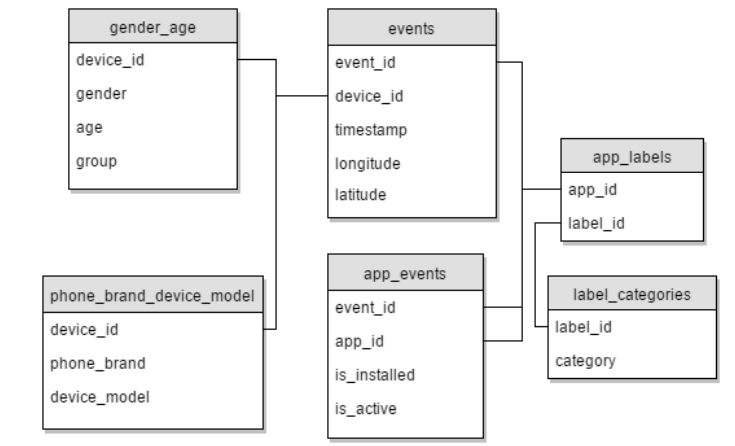

#1.gender_age_train file

In [11]:
gender_age_train = pd.read_csv('/content/drive/MyDrive/TalkingData/gender_age_train.csv')
print('Shape of gender_age_train file : ',gender_age_train.shape)
gender_age_train.head()

Shape of gender_age_train file :  (74645, 4)


,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


Plot reperesenting  how many users does each group contain


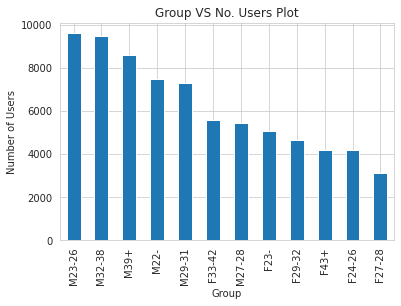

Total number of Users: 74645
Number of groups= 12
Number of Male Users: 47904 -->64.2% 
Number of Female Users: 26741 -->35.8%


In [ ]:
print('Plot reperesenting  how many users does each group contain')
plt.title('Group VS No. Users Plot')
plt.xlabel('Group')
plt.ylabel('Number of Users')
gender_age_train['group'].value_counts().plot.bar()
plt.show()
print('Total number of Users:',len(gender_age_train))
print('Number of groups=',len(gender_age_train['group'].unique()) )

print('Number of Male Users:',gender_age_train['gender'].value_counts()[0],'-->64.2%','\nNumber of Female Users:',gender_age_train['gender'].value_counts()[1],'-->35.8%')

Observation:

1.This is the only training file which we need to use for training other files are just like database with all other external supportive  info related to the device-IDs.

2.This  file contains the device-ID and its corresponding User's Age ,Gender details along the class of age-gender group they belong to.

3.It doesn't contain any null Values

4.We have 74645 Rows and 4 columns(featues).

5.As seen in the graph above the data is imbalanced with respective to gender and different type of groups(classes)

#2.phone_brand_device_model file

This file is like the database which  contains phone brand and its model name for all the devices(device_ids) mentioned in train and test dataset.

In [12]:
phone_brand_device_model = pd.read_csv('/content/drive/MyDrive/TalkingData/phone_brand_device_model.csv')
#removing duplicates
phone_brand_device_model=phone_brand_device_model.drop_duplicates()
print('Shape of phone_brand_device_model file: ',phone_brand_device_model.shape,'\n')
phone_brand_device_model.head()

Shape of phone_brand_device_model file:  (186722, 3) 



,device_id,phone_brand,device_model
0,-8890648629457979026,小米,红米
1,1277779817574759137,小米,MI 2
2,5137427614288105724,三星,Galaxy S4
3,3669464369358936369,SUGAR,时尚手机
4,-5019277647504317457,三星,Galaxy Note 2


In [13]:
#Phone Brand names are in chinese  so converting them to English 
#https://www.kaggle.com/iuga77/translate-brand-names-snippet
English_phone_brands = {"三星": "samsung", "天语": "Ktouch","海信": "hisense", "联想": "lenovo",   "欧比": "obi",    "爱派尔": "ipair",  
"努比亚": "nubia",  "优米": "youmi","朵唯": "dowe", "黑米": "heymi","锤子": "hammer","酷比魔方": "koobee","美图": "meitu","尼比鲁": "nibilu",
    "一加": "oneplus","优购": "yougo","诺基亚": "nokia", "糖葫芦": "candy","中国移动": "ccmc", "语信": "yuxin","基伍": "kiwu","青橙": "greeno",
    "华硕": "asus", "夏新": "panosonic", "维图": "weitu","艾优尼": "aiyouni","摩托罗拉": "moto", "乡米": "xiangmi", "米奇": "micky",
    "大可乐": "bigcola", "沃普丰": "wpf", "神舟": "hasse",  "摩乐": "mole","飞秒": "fs","米歌": "mige", "富可视": "fks", "德赛": "desci",
    "梦米": "mengmi","乐视": "lshi","小杨树": "smallt","纽曼": "newman", "邦华": "banghua", "E派": "epai", "易派": "epai", "普耐尔": "pner",
    "欧新": "ouxin",   "西米": "ximi",  "海尔": "haier",  "波导": "bodao", "糯米": "nuomi", "唯米": "weimi", "酷珀": "kupo",  "谷歌": "google",
    "昂达": "ada" ,    "聆韵": "lingyun",  "小米": "Xiaomi", "华为": "Huawei", "魅族": "Meizu", "中兴": "ZTE",   "酷派": "Coolpad",    "金立": "Gionee",
    "SUGAR": "SUGAR",   "OPPO": "OPPO",   "vivo": "vivo",  "HTC": "HTC",   "LG": "LG", "ZUK": "ZUK",   "TCL": "TCL", "LOGO": "LOGO","Lovme": "Lovme",
    "PPTV": "PPTV", "ZOYE": "ZOYE", "MIL": "MIL",   "索尼" : "Sony","欧博信" : "Opssom",  "奇酷" : "Qiku","酷比" : "CUBE", "康佳" : "Konka",
    "亿通" : "Yitong",   "金星数码" : "JXD","至尊宝" : "Monkey King", "百立丰" : "Hundred Li Feng","贝尔丰" : "Bifer","百加" : "Bacardi", "诺亚信" : "Noain",
    "广信" : "Kingsun",  "世纪天元" : "Ctyon", "青葱" : "Cong", "果米" : "Taobao","斐讯" : "Phicomm", "长虹" : "Changhong", "欧奇" : "Oukimobile",
      "先锋" : "XFPLAY","台电" : "Teclast","大Q" : "Daq","蓝魔" : "Ramos", "奥克斯" : "AUX"
}

phone_brand_device_model.phone_brand = phone_brand_device_model.phone_brand.map(pd.Series(English_phone_brands), na_action='ignore')


In [15]:
#Merging gender_age_train and phone_brand_device_model dataframes 
gender_age_train.set_index('device_id')
phone_brand_device_model.set_index('device_id')
gender_mobile_data = pd.merge(left=gender_age_train, right=phone_brand_device_model, left_on='device_id', right_on='device_id')
gender_mobile_data.head()

,device_id,gender,age,group,phone_brand,device_model
0,-8076087639492063270,M,35,M32-38,Xiaomi,MI 2
1,-2897161552818060146,M,35,M32-38,Xiaomi,MI 2
2,-8260683887967679142,M,35,M32-38,Xiaomi,MI 2
3,-4938849341048082022,M,30,M29-31,Xiaomi,红米note
4,245133531816851882,M,30,M29-31,Xiaomi,MI 3


In [17]:
print(len(gender_mobile_data.phone_brand.unique()), 'unique brands of mobile devices are used by the Users')
print(len(gender_mobile_data.device_model.unique()), 'unique models of mobile devices are used by the Users')

97 unique brands of mobile devices are used by the Users
1438 unique models of mobile devices are used by the Users


In [18]:
#Picking up top ten models and top fifteen phone brands:
Top_Ten_Brands=gender_mobile_data['phone_brand'].value_counts()[0:10]
Top_Ten_Brands=Top_Ten_Brands.to_dict()

Top_Ten_Phone_Models=gender_mobile_data['device_model'].value_counts()[0:15]
Top_Ten_Phone_Models=Top_Ten_Phone_Models.to_dict()

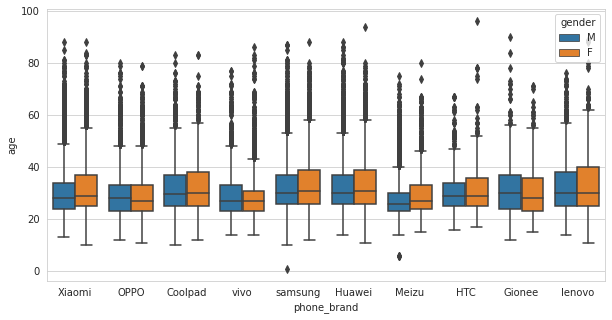

In [19]:
#Boxplot between Phone Brands & Age:
gender_mobile_data1=gender_mobile_data.loc[gender_mobile_data['phone_brand'].isin(Top_Ten_Brands.keys())]
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.boxplot(x = 'phone_brand', y = 'age',hue='gender' ,data = gender_mobile_data1)

Observations:

1.Samsung ,Huawei & Lenovo brands are used by old age people 

2.Vivo & Meozu are mostly used by Young age people

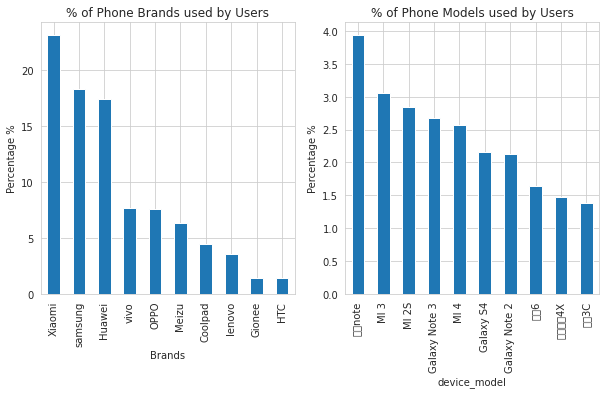

In [20]:
#Plotting the distribution of Phone Brand and the Phone Models across the % of Users
plt.figure(figsize=(10,5))
plt.subplot(1, 2,1)
(phone_brand_device_model['phone_brand'].value_counts()[0:10]/len(phone_brand_device_model)*100).plot.bar()
plt.title('% of Phone Brands used by Users')
plt.xlabel('Brands')
plt.ylabel('Percentage %')

#******************************************#

plt.subplot(1, 2,2)
(phone_brand_device_model['device_model'].value_counts()[0:10]/len(phone_brand_device_model)*100).plot.bar()
plt.title('% of Phone Models used by Users')
plt.xlabel('device_model')
plt.ylabel('Percentage %')
plt.show()

Observations:

1.With above graphs, we see the  Top 10 brands have almost 90%  and Top 10 models occupy 25% share of devices used by Talking Data customers.

2.We can draw the info like there is much probability that a device belongs to Male user.Like example Samsung Galaxy Note can be mostly used by Male user of age of 30+ .

3.But we can't draw the absolute info with the unbalanced data.So its true that we can predict the target variable using the phone_brand and device_model but which is not so enough to predict the target Class.

4.Device specifications like Ram,Camera,Storage,Design,Available Colors can be added as external information for more accurate prediction

#3.Events Data

This file is like the database which  contains events data.We need to map this data with Device IDs in  train and test dataset.

In [22]:
events_data = pd.read_csv('/content/drive/MyDrive/TalkingData/events.csv')
events_data=events_data.drop_duplicates()
print('Shape of events_data file : ',events_data.shape,'\n')
events_data.head()

Shape of events_data file :  (3252950, 5) 



,event_id,device_id,timestamp,longitude,latitude
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70
3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28
4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66


In [34]:
#Merging gender_age_train ,phone_brand_device_model and events_data dataframes
gender_data_event = gender_age_train.merge(phone_brand_device_model,on='device_id').merge(events_data,on='device_id').drop_duplicates()
print('Shape of gender_data_event file : ',gender_data_event.shape,'\n')
print('Devices with Events Data:',len(gender_data_event['device_id'].unique()),'which is ',round(((len(gender_data_event['device_id'].unique())/len(gender_age_train))*100),2),'percentage of overall training data \n')
gender_data_event.head()

Shape of gender_data_event file :  (1215616, 10) 

Devices with Events Data: 23309 which is  31.23 percentage of overall training data 



,device_id,gender,age,group,phone_brand,device_model,event_id,timestamp,longitude,latitude
0,-8260683887967679142,M,35,M32-38,Xiaomi,MI 2,2479656,2016-05-01 14:23:37,0.00,0.00
1,7477216237379271436,F,37,F33-42,Huawei,荣耀6 plus,280934,2016-05-04 14:10:03,119.57,31.75
2,7477216237379271436,F,37,F33-42,Huawei,荣耀6 plus,363585,2016-05-04 14:13:30,119.57,31.75
3,7477216237379271436,F,37,F33-42,Huawei,荣耀6 plus,935225,2016-05-06 18:51:15,0.00,0.00
4,7477216237379271436,F,37,F33-42,Huawei,荣耀6 plus,1551108,2016-05-04 14:09:29,119.57,31.75


Observation:
Only 31% of devices in training data is provided with Event Data 

##3.1 Event Day and Hour

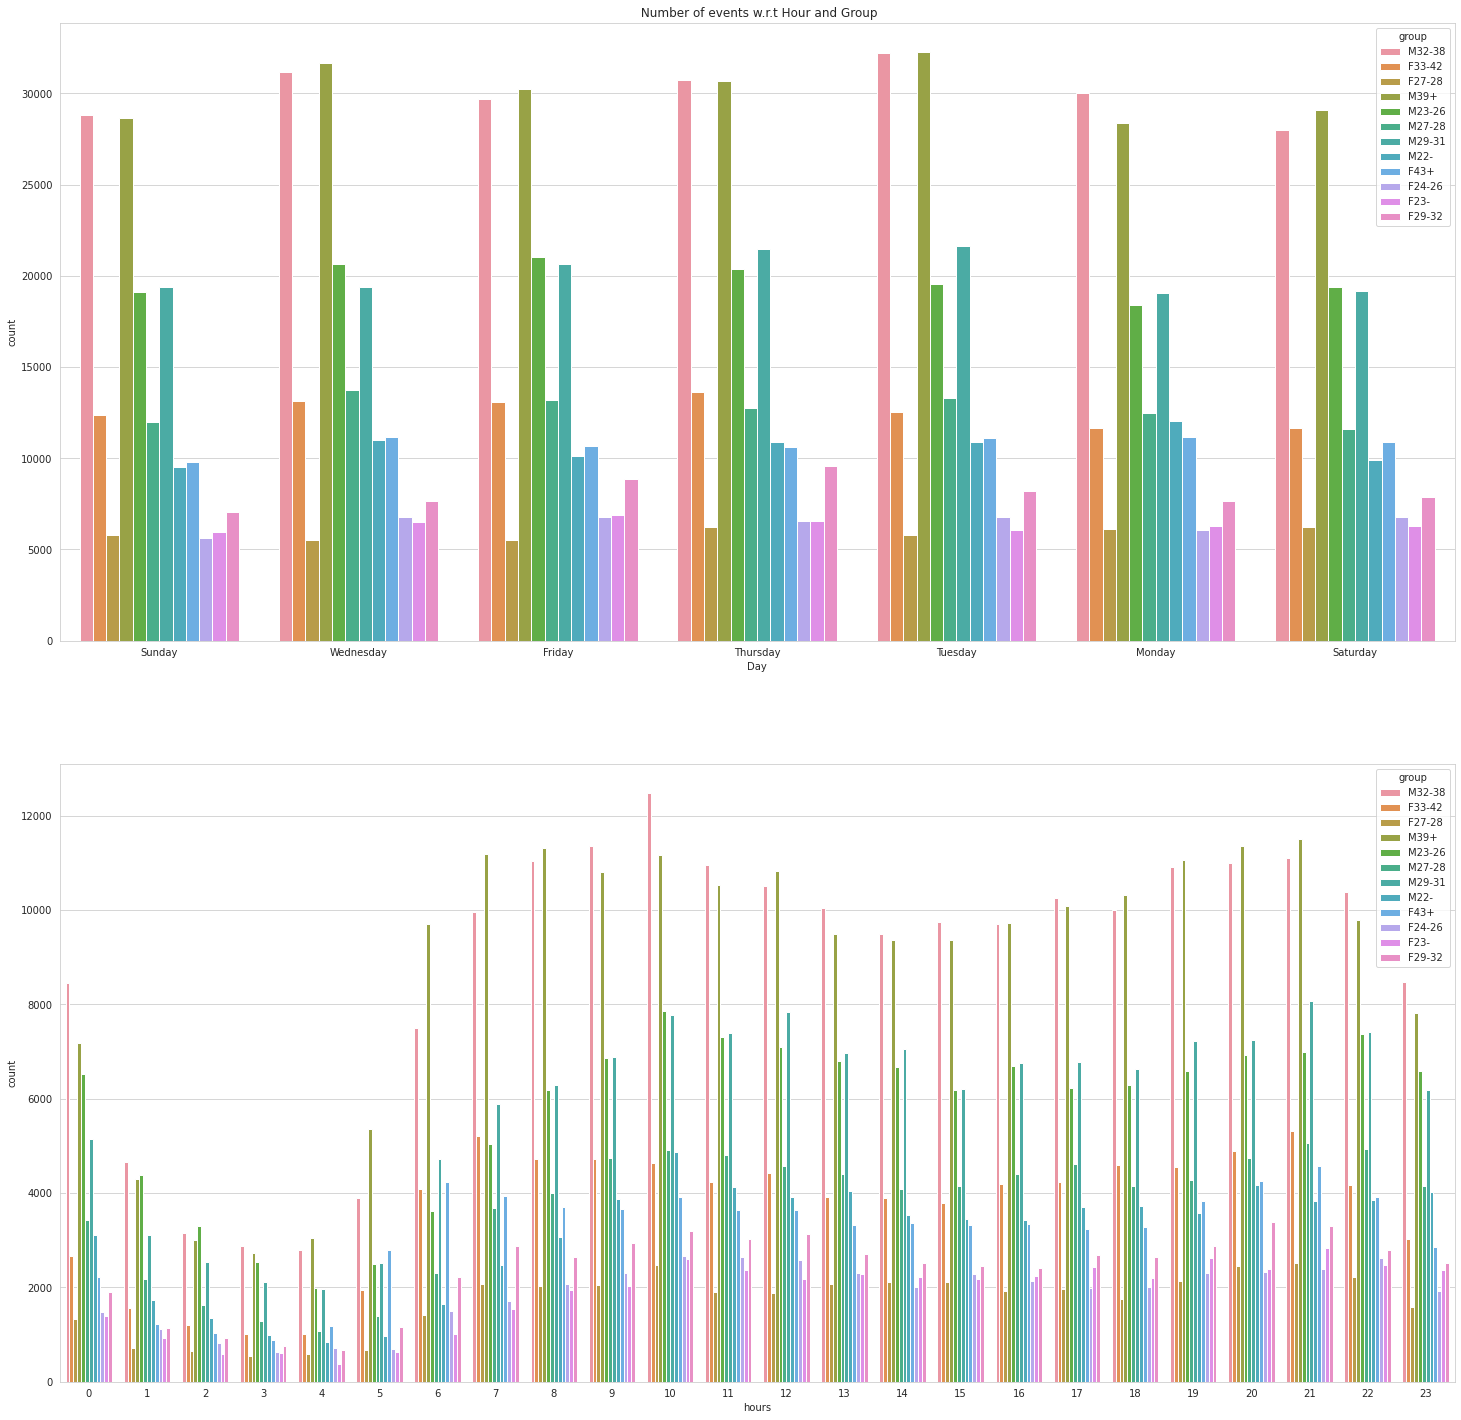

In [35]:
import calendar
from matplotlib.pyplot import figure
plt.figure(figsize=(25,25))
#Distribution of events w.r.t Day and Group
plt.title(' Number of events w.r.t Day and Group')
plt.subplot(2, 1,1)
gender_data_event['timestamp']=pd.to_datetime(gender_data_event.timestamp)
gender_data_event['Day'] = gender_data_event.timestamp.dt.day_name()
sns.countplot(x="Day",hue="group", data=gender_data_event)

#Distribution of events w.r.t Hour and Group
plt.title(' Number of events w.r.t Hour and Group')
plt.subplot(2, 1,2)
gender_data_event['hours'] = gender_data_event['timestamp'].apply(lambda x: x.hour)
sns.countplot(x='hours',hue='group' ,data=gender_data_event)
plt.show()

In [36]:
gender_data_event['dayofyear']= gender_data_event['timestamp'].apply(lambda x: x.dayofyear)

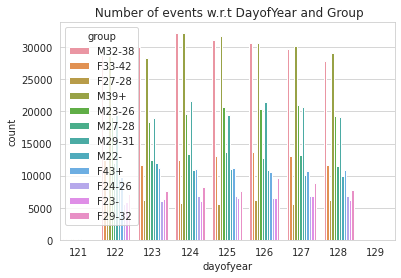

Event data is provide from starting  2016-04-30 23:52:24  to  2016-05-08 00:00:08


In [37]:
#Distribution of events w.r.t DayofYear and Group
plt.title(' Number of events w.r.t DayofYear and Group')
sns.countplot(x='dayofyear',hue='group' ,data=gender_data_event)
plt.show()
print('Event data is provide from starting ' ,gender_data_event ['timestamp'].min(),' to ',gender_data_event ['timestamp'].max())

Observation:

1.Event data is provided only for a week from May1st to May 7th in 2016.

2.Distribution of Groups across the time-hour of the events not well uniform and it can be a good feature for training

##3.2 Latitude & Longitude

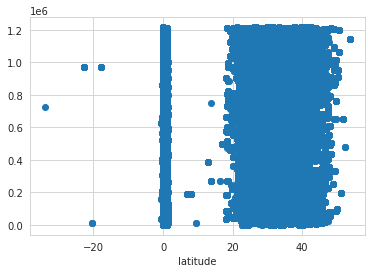

In [ ]:
#latitude
kp = np.arange(1, len(gender_data_event)+1)
lk=gender_data_event['latitude'].values
plt.xlabel("latitude")
plt.scatter(lk,kp) 
plt.show()

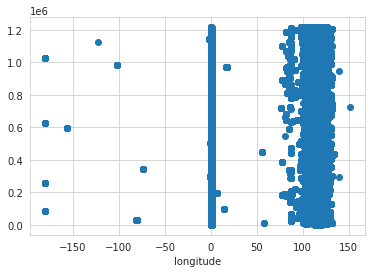

In [38]:
#longitude
kp = np.arange(1, len(gender_data_event)+1)
lk=gender_data_event['longitude'].values
plt.xlabel("longitude")
plt.scatter(lk,kp) 
plt.show()

In [39]:
count_0=len(gender_data_event.loc[gender_data_event['latitude']==0.00].loc[gender_data_event['longitude']==0.00])
per=round((count_0/len(gender_data_event)*100),2)
print('Number of 0.00 0.00 locations :',count_0,per,'percenatge of total event location values')

Number of 0.00 0.00 locations : 356175 29.3 percenatge of total event location values


Observation:

1.Latitude and Longitude with 0 & 1 values can be considered as majot outlier which constitues almost 30% of data

2.Lat-long coorditates for cities in China are in range: Latitude from 18.24306 to 52.33333 and longitude from 75.98951 to 134.28917.
    So considering the values in the given actual range can give better results by eliminating the outliers
    
3.Latitude and Longitude values  are provided some negative values as well which should be taken care

# 4.Label_categories file

In [42]:
label_categories = pd.read_csv('/content/drive/MyDrive/TalkingData/label_categories.csv')
label_categories=label_categories.drop_duplicates()
print('Shape of label_categories file : ',label_categories.shape,'\n')
label_categories.head()

Shape of label_categories file :  (930, 2) 



,label_id,category
0,1,NaN
1,2,game-game type
2,3,game-Game themes
3,4,game-Art Style
4,5,game-Leisure time


In [43]:
print('Number of Categories:',len(label_categories['category'].unique()))
print('Number of Label_IDs:',len(label_categories['label_id'].unique()))

Number of Categories: 836
Number of Label_IDs: 930


#5.App Labels Data

In [45]:
apps_label_data = pd.read_csv('/content/drive/MyDrive/TalkingData/app_labels.csv')
apps_label_data=apps_label_data.drop_duplicates()
print('Shape of apps_label_data file : ',apps_label_data.shape,'\n')
apps_label_data.head()

Shape of apps_label_data file :  (459452, 2) 



,app_id,label_id
0,7324884708820027918,251
1,-4494216993218550286,251
2,6058196446775239644,406
3,6058196446775239644,407
4,8694625920731541625,406


#6.App Events Data

In [46]:
apps_events_data = pd.read_csv('/content/drive/MyDrive/TalkingData/app_events.csv')
apps_events_data.head()


,event_id,app_id,is_installed,is_active
0,2,5927333115845830913,1,1
1,2,-5720078949152207372,1,0
2,2,-1633887856876571208,1,0
3,2,-653184325010919369,1,1
4,2,8693964245073640147,1,1


In [47]:
apps_events_data['is_installed'].value_counts()

1    32473067
Name: is_installed, dtype: int64

In [48]:
apps_events_data['is_active'].value_counts()

0    19740071
1    12732996
Name: is_active, dtype: int64

In [49]:
round((apps_events_data['is_active'].value_counts()[0]/len(apps_events_data))*100,2)

60.79

# **Overall Observations**:

1.The given train data is imbalanced w.r.t gender and group(here target classes) which should be remembered when calculating performance of model.

2.Only 31% of data is provided with events data.

3.Event data is logged for only 1 continous week for MAy1st week 
2016.

4.Hour feature from timestamp of event data can be used for Training 

5.Location details in events data consists of around 30% of outliers which should be taken care of during training

6.60.8 percentage of Event linked Apps were stated as Inactive which should be taken during training.